<a href="https://colab.research.google.com/github/kameshsuryavanshi/RGB_To_Gray/blob/main/rgbToGray_Serial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
import os
import time

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = '/content/drive/MyDrive/Colab Notebooks/RGB'

Serial Code for RGB to Grayscale

In [ ]:
def rgbToGray(image):
  return 0.299 * image[..., 0] + 0.587 * image[..., 1] + 0.114 * image[..., 2]

In [ ]:
import numpy as np
from numpy import zeros, newaxis

In [ ]:
rgb=np.empty(shape=(0,360,300,3),dtype='int64')

In [ ]:
for i in range(0,1000):
  rgb_data=cv.imread(dir+'/'+os.listdir(dir)[i])
  rgb_data=rgb_data[newaxis,:,:,:]
  rgb=np.append(rgb,rgb_data,axis=0)
  print(rgb_data.shape,rgb.shape)

(1, 360, 300, 3) (1, 360, 300, 3)
(1, 360, 300, 3) (2, 360, 300, 3)
(1, 360, 300, 3) (3, 360, 300, 3)
(1, 360, 300, 3) (4, 360, 300, 3)
(1, 360, 300, 3) (5, 360, 300, 3)
(1, 360, 300, 3) (6, 360, 300, 3)
(1, 360, 300, 3) (7, 360, 300, 3)
(1, 360, 300, 3) (8, 360, 300, 3)
(1, 360, 300, 3) (9, 360, 300, 3)
(1, 360, 300, 3) (10, 360, 300, 3)
(1, 360, 300, 3) (11, 360, 300, 3)
(1, 360, 300, 3) (12, 360, 300, 3)
(1, 360, 300, 3) (13, 360, 300, 3)
(1, 360, 300, 3) (14, 360, 300, 3)
(1, 360, 300, 3) (15, 360, 300, 3)
(1, 360, 300, 3) (16, 360, 300, 3)
(1, 360, 300, 3) (17, 360, 300, 3)
(1, 360, 300, 3) (18, 360, 300, 3)
(1, 360, 300, 3) (19, 360, 300, 3)
(1, 360, 300, 3) (20, 360, 300, 3)
(1, 360, 300, 3) (21, 360, 300, 3)
(1, 360, 300, 3) (22, 360, 300, 3)
(1, 360, 300, 3) (23, 360, 300, 3)
(1, 360, 300, 3) (24, 360, 300, 3)
(1, 360, 300, 3) (25, 360, 300, 3)
(1, 360, 300, 3) (26, 360, 300, 3)
(1, 360, 300, 3) (27, 360, 300, 3)
(1, 360, 300, 3) (28, 360, 300, 3)
(1, 360, 300, 3) (29, 360, 30

In [ ]:
rgb.shape

(1000, 360, 300, 3)

In [ ]:
rgb100 =rgb[0:100]
rgb250 =rgb[0:250]
rgb500 =rgb[0:500]
rgb750 =rgb[0:750]
rgb1000 =rgb[0:1000]

In [ ]:
exec_t=[100,250,500,750,1000]

In [ ]:
etime=[]

In [ ]:

for i in exec_t:
  result =np.empty(shape=(360,300),dtype='int64')
  result=result[newaxis,:,:]
  input = rgb[0:i]
  start = time.time()
  for i in range(0,i):
    data =rgbToGray(input[i])
    data=data[newaxis,:,:]
    result=np.append(result,data,axis=0)
  end = time.time()
  etime.append(end-start)

In [ ]:
etime

[2.448045492172241,
 9.797881841659546,
 39.8642680644989,
 86.31403040885925,
 160.40820288658142]

In [ ]:
start = time.time()

for i in
for i in range():
  data =rgbToGray(rgb[i])
  data=data[newaxis,:,:]
  result=np.append(result,data,axis=0)
end = time.time()

SyntaxError: ignored

In [ ]:
print(end-start)

228.55536794662476


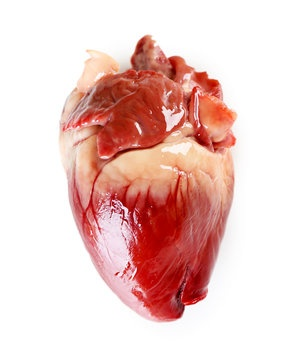

In [ ]:
cv2_imshow(rgb[7])

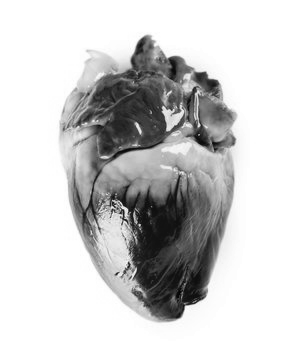

In [ ]:
cv2_imshow(result[7])

In [ ]:
!pip install ray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 13.1 MB/s eta 0:00:00


In [ ]:
import ray
import numpy as np
import matplotlib.pyplot as plt
ray.init()
@ray.remote
def rgb_to_grayscale_luminosity_parallel(rgb_slice):
    return 0.299 * rgb_slice[..., 0] + 0.587 * rgb_slice[..., 1] + 0.114 * rgb_slice[..., 2]

def parallel_rgb_to_grayscale_luminosity(rgb_data):
    num_slices = 4  # You can adjust this based on your available resources
    slices = np.array_split(rgb_data, num_slices, axis=0)

    # Distribute data
    slice_ids = [ray.put(slice_) for slice_ in slices]

    # Perform parallel RGB to grayscale conversion
    result_ids = [rgb_to_grayscale_luminosity_parallel.remote(slice_id) for slice_id in slice_ids]

    # Retrieve results
    results = ray.get(result_ids)

    # Concatenate the results
    return np.concatenate(results, axis=0)



2023-12-01 06:22:38,157	INFO worker.py:1673 -- Started a local Ray instance.


For Multiple slices

In [ ]:
ray.shutdown()

In [ ]:
import ray
import numpy as np
import matplotlib.pyplot as plt
ray.init()
@ray.remote
def rgb_to_grayscale_luminosity_parallel(rgb_slice):
    return 0.299 * rgb_slice[..., 0] + 0.587 * rgb_slice[..., 1] + 0.114 * rgb_slice[..., 2]

def parallel_rgb_to_grayscale_luminosity(rgb_data):
    num_slices =  4 # You can adjust this based on your available resources
    slices = np.array_split(rgb_data, num_slices, axis=0)

    # Distribute data
    slice_ids = [ray.put(slice_) for slice_ in slices]

    # Perform parallel RGB to grayscale conversion
    result_ids = [rgb_to_grayscale_luminosity_parallel.remote(slice_id) for slice_id in slice_ids]

    # Retrieve results
    results = ray.get(result_ids)

    # Concatenate the results
    return np.concatenate(results, axis=0)

2023-11-29 17:18:01,780	INFO worker.py:1673 -- Started a local Ray instance.


In [ ]:
start_p = time.time()
gresult = parallel_rgb_to_grayscale_luminosity(rgb[0:100])
end_p= time.time()
print(end_p-start_p)


1.4660429954528809


In [ ]:
start_p = time.time()
gresult = parallel_rgb_to_grayscale_luminosity(rgb[0:250])
end_p= time.time()
print(end_p-start_p)

0.7816741466522217


In [ ]:
start_p = time.time()
gresult = parallel_rgb_to_grayscale_luminosity(rgb[0:500])
end_p= time.time()
print(end_p-start_p)

3.2349278926849365


In [ ]:
start_p = time.time()
gresult = parallel_rgb_to_grayscale_luminosity(rgb[0:750])
end_p= time.time()
print(end_p-start_p)

2.4123880863189697


In [ ]:
start_p = time.time()
gresult = parallel_rgb_to_grayscale_luminosity(rgb[0:1000])
end_p= time.time()
print(end_p-start_p)

3.673813581466675


In [ ]:
ray.shutdown()

In [ ]:
etimep = []
for i in range(2,10):
  start_p = time.time()
  gresult = parallel_rgb_to_grayscale_luminosity(rgb[0:1000],i)
  end_p= time.time()
  etimep.append(end_p - start_p)
print(etimep)
ray.shutdown()

TypeError: ignored

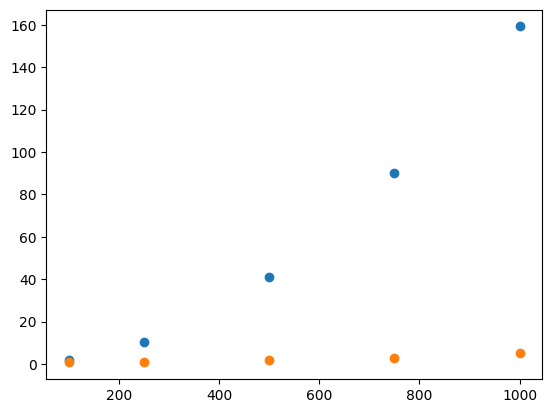

In [ ]:

import matplotlib.pyplot as plt


plt.scatter(exec_t,etime)
plt.scatter(exec_t,etimep)
plt.show()

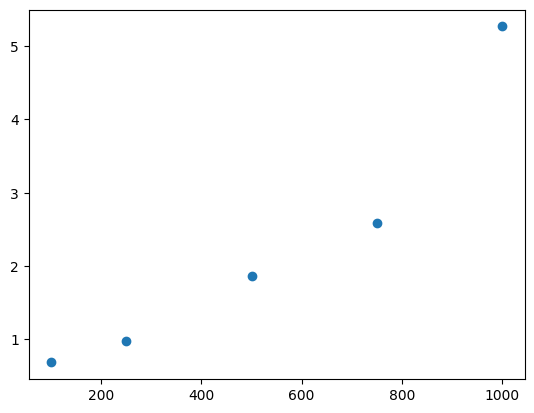

In [ ]:

plt.scatter(exec_t,etimep)
plt.show()

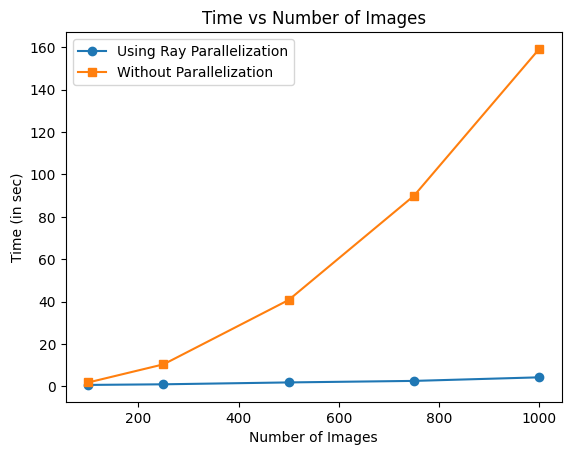

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.array([0.684772253036499, 0.9776668548583984, 1.8634023666381836, 2.5825443267822266, 4.267977714538574])
x2 = np.array([1.8567979335784912, 10.394176721572876, 40.786749839782715, 89.94319128990173, 159.2286672592163])
y = np.array([100,250, 500, 750, 1000])

# Plotting the lines and assigning labels with markers
plt.plot(y, x1, marker='o', label='Using Ray Parallelization')
plt.plot(y, x2, marker='s', label='Without Parallelization')

plt.ylabel("Time (in sec)")
plt.xlabel("Number of Images")
plt.title("Time vs Number of Images")

# Adding legend to the plot
plt.legend()

plt.show()

In [ ]:
x3=np.array([0,0,0,0,0])
for i in range(5):
  x3[i]=x2[i]/x1[i]

In [ ]:
x3

array([ 2, 10, 21, 34, 37])

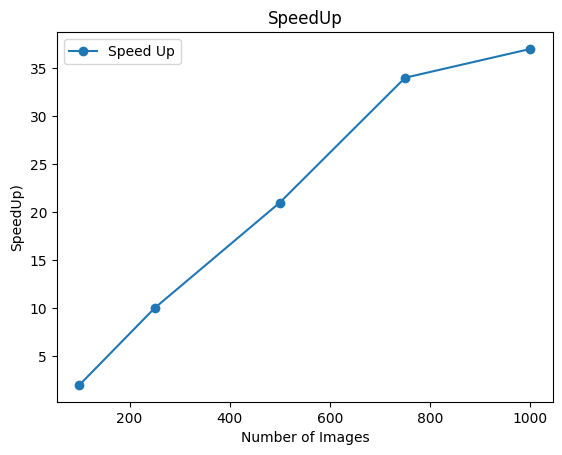

In [ ]:
plt.plot(y, x3, marker='o', label='Speed Up')

plt.ylabel("SpeedUp)")
plt.xlabel("Number of Images")
plt.title("SpeedUp" )

# Adding legend to the plot
plt.legend()

plt.show()

In [ ]:

# Perform parallel RGB to grayscale conversion
start_p = time.time()
gresult = parallel_rgb_to_grayscale_luminosity(rgb)
end_p= time.time()
ray.shutdown()

(raylet) Spilled 4076 MiB, 7 objects, write throughput 30 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.


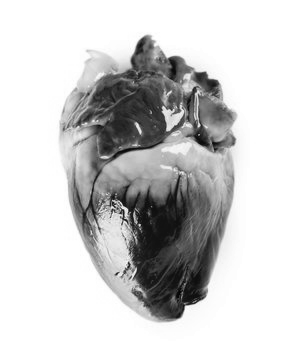

In [ ]:
cv2_imshow(gresult[999])

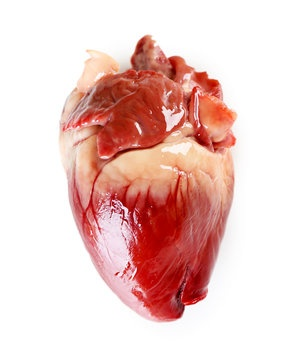

In [ ]:
cv2_imshow(rgb[999])